<a href="https://colab.research.google.com/github/Fer-2022/Investigaci-n-de-operaciones-/blob/main/Proyecto_RUTA_CRITICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

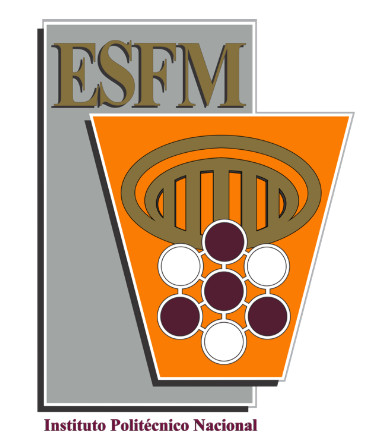


            **PROYECTO RUTA CRITICA**


Investigaccion de Operaciones


Integrantes:

Desireé Salim Sosa Gomez

Fernando Rangel Calderon

<h3><span style="color:red">¿QUÉ ES LA RUTA CRÍTICA?</span></h3>

<p>
La <b>ruta crítica</b> es una herramienta fundamental en la gestión de proyectos que permite identificar las actividades más críticas y determinar la duración total del proyecto.
</p>

<h4><span style="color:green">Definición de Ruta Crítica</span></h4>
<p>
La ruta crítica se refiere a la secuencia de actividades que determina la duración total de un proyecto. Es decir, es el camino más largo a través de la red de actividades, y cualquier retraso en estas actividades resultará en un retraso en la finalización del proyecto. Este concepto es esencial en la Investigación de Operaciones y se utiliza para optimizar la planificación y gestión de proyectos.
</p>

<p><i>Ingeniería Industrial Online</i></p>

<h4><span style="color:blue">Método de la Ruta Crítica (CPM)</span></h4>
<p>
El método de la ruta crítica (<b>CPM</b>, por sus siglas en inglés) es un algoritmo que ayuda a planificar proyectos mediante la identificación de las actividades críticas y la estimación de la duración del proyecto.
</p>

<p><b>Los pasos básicos para aplicar el CPM son:</b></p>
<ul>
  <li><b>Identificación de Actividades:</b> Listar todas las actividades necesarias para completar el proyecto, junto con sus duraciones estimadas.</li>
  <li><b>Determinación de Dependencias:</b> Establecer qué actividades deben completarse antes de que otras puedan comenzar.</li>
  <li><b>Construcción del Diagrama de Red:</b> Crear un diagrama que represente las actividades como nodos y las dependencias como flechas que conectan estos nodos.</li>
  <li><b>Cálculo de Tiempos:</b> Calcular los tiempos temprano y tardío para cada actividad, lo que ayuda a identificar la flexibilidad en la programación.</li>
  <li><b>Identificación de la Ruta Crítica:</b> Las actividades que no tienen holgura (es decir, donde el tiempo temprano y tardío son iguales) forman la ruta crítica.</li>
</ul>

<h4><span style="color:purple">Importancia de la Ruta Crítica</span></h4>
<p>
La identificación de la ruta crítica es crucial porque permite a los gerentes de proyectos:
</p>
<ul>
  <li><b>Priorizar Recursos:</b> Enfocar recursos y atención en las actividades críticas para evitar retrasos.</li>
  <li><b>Optimizar Tiempos:</b> Reducir la duración total del proyecto al identificar y gestionar las actividades que afectan directamente el tiempo de finalización.</li>
  <li><b>Planificar Mejor:</b> Facilitar la planificación y el seguimiento del progreso del proyecto.</li>
</ul>


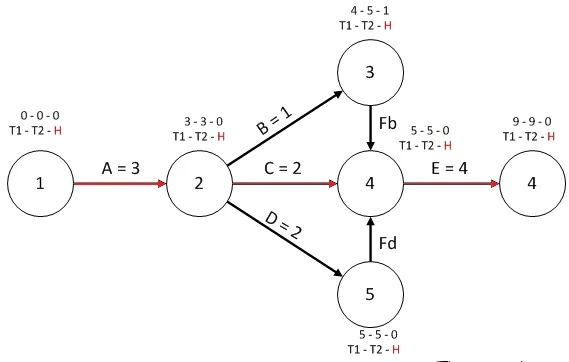


<h3><span style="color:red">Ejercicio- Ruta Crítica CPM:</span></h3>

Una firma de contadores públicos requiere las siguientes actividades para una auditoría:

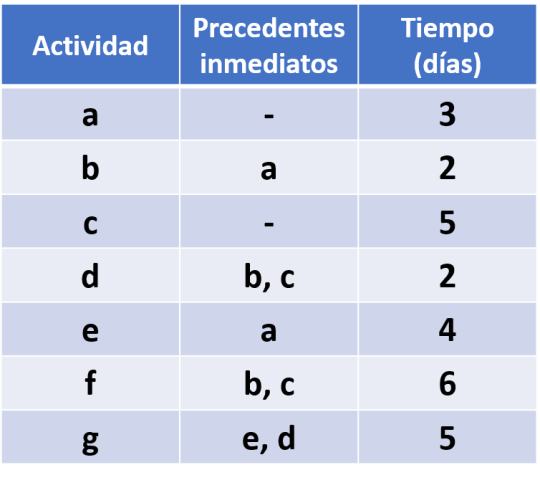


a) Dibuje una red para este proyecto.

b) Haga un pase hacia adelante y un pase hacia atrás para determinar el IP, TP, IL  y TL.

c) ¿Cuál es la ruta crítica y el tiempo de terminación del proyecto?



REALIZAREMOS ESTE EJERCICIO USANDO LA LIBRERIA networkx

In [ ]:
# Parte 1: imports y datos
import networkx as nx
import matplotlib.pyplot as plt

# Duraciones (días) y predecesores inmediatos según la tabla
durations = {'a': 3, 'b': 2, 'c': 5, 'd': 2, 'e': 4, 'f': 6, 'g': 5}
predecessors = {
    'a': [],
    'b': ['a'],
    'c': [],
    'd': ['b', 'c'],
    'e': ['a'],
    'f': ['b', 'c'],
    'g': ['e', 'd']
}

# Imprime los datos para verificar
print("Duraciones:", durations)
print("Predecesores:", predecessors)


Duraciones: {'a': 3, 'b': 2, 'c': 5, 'd': 2, 'e': 4, 'f': 6, 'g': 5}
Predecesores: {'a': [], 'b': ['a'], 'c': [], 'd': ['b', 'c'], 'e': ['a'], 'f': ['b', 'c'], 'g': ['e', 'd']}


In [ ]:
# Parte 2: construir el grafo
G = nx.DiGraph()

# Añadir nodos con atributo 'duration'
for act, dur in durations.items():
    G.add_node(act, duration=dur)

# Añadir aristas desde cada predecesor hacia la actividad
for act, preds in predecessors.items():
    for p in preds:
        G.add_edge(p, act)

# Checar si es un DAG (debe serlo)
if not nx.is_directed_acyclic_graph(G):
    raise ValueError("El grafo no es acíclico. Revisa las precedencias.")
print("Grafo construido. Número de nodos:", G.number_of_nodes(), "Número de aristas:", G.number_of_edges())


Grafo construido. Número de nodos: 7 Número de aristas: 8


In [ ]:
# Parte 3: orden topológico
topo_order = list(nx.topological_sort(G))
print("Orden topológico válido (una posible secuencia):")
print(topo_order)


Orden topológico válido (una posible secuencia):
['a', 'c', 'b', 'e', 'd', 'f', 'g']


In [ ]:
# Parte 4: pase hacia adelante
ES = {}  # earliest start
EF = {}  # earliest finish

for node in topo_order:
    preds = list(G.predecessors(node))
    if not preds:
        ES[node] = 0
    else:
        ES[node] = max(EF[p] for p in preds)
    EF[node] = ES[node] + G.nodes[node]['duration']
    print(f"Actividad {node}: Dur={G.nodes[node]['duration']}, ES={ES[node]}, EF={EF[node]}")

project_duration = max(EF.values())
print("\nTiempo de terminación (duración mínima del proyecto) =", project_duration, "días")


Actividad a: Dur=3, ES=0, EF=3
Actividad c: Dur=5, ES=0, EF=5
Actividad b: Dur=2, ES=3, EF=5
Actividad e: Dur=4, ES=3, EF=7
Actividad d: Dur=2, ES=5, EF=7
Actividad f: Dur=6, ES=5, EF=11
Actividad g: Dur=5, ES=7, EF=12

Tiempo de terminación (duración mínima del proyecto) = 12 días


In [ ]:
# Parte 5: pase hacia atrás
LF = {}  # latest finish
LS = {}  # latest start

for node in reversed(topo_order):
    succs = list(G.successors(node))
    if not succs:
        LF[node] = project_duration
    else:
        LF[node] = min(LS[s] for s in succs)
    LS[node] = LF[node] - G.nodes[node]['duration']
    print(f"Actividad {node}: LS={LS[node]}, LF={LF[node]}")


Actividad g: LS=7, LF=12
Actividad f: LS=6, LF=12
Actividad d: LS=5, LF=7
Actividad e: LS=3, LF=7
Actividad b: LS=3, LF=5
Actividad c: LS=0, LF=5
Actividad a: LS=0, LF=3


In [ ]:
# Parte 6: holgura y rutas críticas
slack = {n: LS[n] - ES[n] for n in G.nodes()}
print("\nHolguras (SLACK):")
for n in topo_order:
    print(f" {n}: Slack = {slack[n]}")

# calcular inicios (sin predecesores) y finales (sin sucesores)
starts = [n for n in G.nodes() if G.in_degree(n) == 0]
ends = [n for n in G.nodes() if G.out_degree(n) == 0]

all_paths = []
for s in starts:
    for t in ends:
        for path in nx.all_simple_paths(G, source=s, target=t):
            time_sum = sum(durations[node] for node in path)
            all_paths.append((path, time_sum))

print("\nCaminos desde nodos iniciales a finales y sus duraciones:")
for path, tsum in all_paths:
    print(f"  {path} -> {tsum} días")

# rutas críticas: duración total == project_duration
critical_paths = [p for p, tsum in all_paths if tsum == project_duration]
print("\nRuta(s) crítica(s):")
for p in critical_paths:
    print(" -> ".join(p))



Holguras (SLACK):
 a: Slack = 0
 c: Slack = 0
 b: Slack = 0
 e: Slack = 0
 d: Slack = 0
 f: Slack = 1
 g: Slack = 0

Caminos desde nodos iniciales a finales y sus duraciones:
  ['a', 'b', 'f'] -> 11 días
  ['a', 'b', 'd', 'g'] -> 12 días
  ['a', 'e', 'g'] -> 12 días
  ['c', 'f'] -> 11 días
  ['c', 'd', 'g'] -> 12 días

Ruta(s) crítica(s):
a -> b -> d -> g
a -> e -> g
c -> d -> g


In [ ]:
# Parte 7: tabla resumen
print("\nResumen final (Act, Dur, ES, EF, LS, LF, Slack):")
print(f"{'Act':<4}{'Dur':>5}{'ES':>8}{'EF':>8}{'LS':>8}{'LF':>8}{'Slack':>8}")
for n in topo_order:
    print(f"{n:<4}{durations[n]:>5}{ES[n]:>8}{EF[n]:>8}{LS[n]:>8}{LF[n]:>8}{slack[n]:>8}")

print("\nTiempo de terminación del proyecto:", project_duration, "días")
print("Rutas críticas detectadas:")
for p in critical_paths:
    print(" -> ".join(p))



Resumen final (Act, Dur, ES, EF, LS, LF, Slack):
Act   Dur      ES      EF      LS      LF   Slack
a       3       0       3       0       3       0
c       5       0       5       0       5       0
b       2       3       5       3       5       0
e       4       3       7       3       7       0
d       2       5       7       5       7       0
f       6       5      11       6      12       1
g       5       7      12       7      12       0

Tiempo de terminación del proyecto: 12 días
Rutas críticas detectadas:
a -> b -> d -> g
a -> e -> g
c -> d -> g


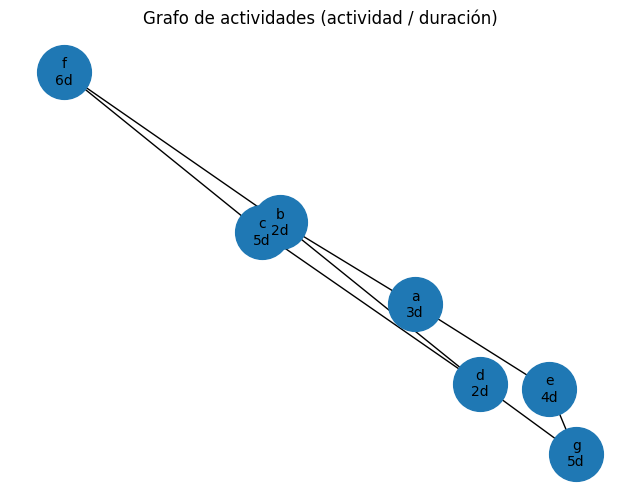

In [10]:
# Parte 8: dibujar la red y destacar aristas críticas
# Preparar lista de aristas críticas (vistas desde los caminos críticos)
critical_edges = set()
for p in critical_paths:
    for i in range(len(p)-1):
        critical_edges.add((p[i], p[i+1]))

# posiciones fijas para consistencia
pos = nx.spring_layout(G, seed=42)

# Figura 1: grafo simple con duraciones
plt.figure(figsize=(8,6))
node_labels = {n: f"{n}\n{durations[n]}d" for n in G.nodes()}
nx.draw_networkx_nodes(G, pos, node_size=1500)
nx.draw_networkx_edges(G, pos, arrows=True)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10)
plt.title("Grafo de actividades (actividad / duración)")
plt.axis('off')
plt.show()



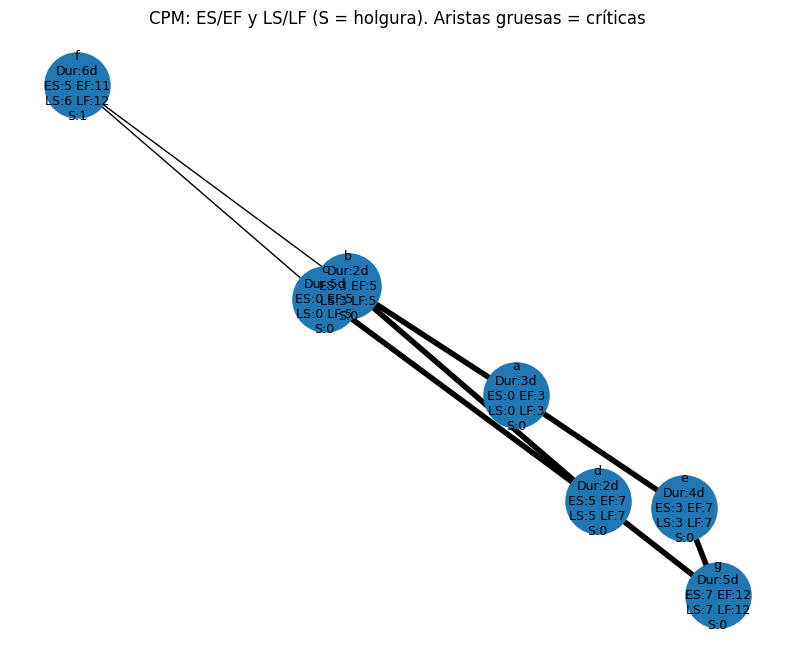

In [11]:
# Figura 2: grafo detallado con ES/EF y LS/LF, aristas críticas gruesas
plt.figure(figsize=(10,8))
detailed_labels = {}
for n in G.nodes():
    detailed_labels[n] = (f"{n}\nDur:{durations[n]}d\n"
                          f"ES:{ES[n]} EF:{EF[n]}\n"
                          f"LS:{LS[n]} LF:{LF[n]}\n"
                          f"S:{slack[n]}")
nx.draw_networkx_nodes(G, pos, node_size=2200)
# dibujar aristas normales
nx.draw_networkx_edges(G, pos, arrows=True, width=1.0)
# sobre-dibujar aristas críticas con mayor ancho
if critical_edges:
    nx.draw_networkx_edges(G, pos, edgelist=list(critical_edges), arrows=True, width=4.0)
nx.draw_networkx_labels(G, pos, labels=detailed_labels, font_size=9)
plt.title("CPM: ES/EF y LS/LF (S = holgura). Aristas gruesas = críticas")
plt.axis('off')
plt.show()


BIBLIOGRAFIA:

https://www.plandemejora.com/ruta-critica-ejercicios-resueltos/